In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('./data/shots/shot log ATL.csv')

In [108]:
df.shape

(6917, 16)

In [109]:
df = df.drop(['self previous shot', 'opponent previous shot', 'time from last shot'], axis = 1)
df = df.rename(columns={'player position':'player_position','shot type':'shot_type','away team': 'away_team','current shot outcome':'outcome', 'home team' : 'home_team', 'location x':'loc_x','location y':'loc_y','shoot player':'shooter','home game':'home'})

In [110]:
df.head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome
0,SF,Yes,97.0,ATL,Pullup Jump Shot,2,WAS,405.0,1:09,2016-10-27,Kent Bazemore,1,MISSED
1,C,Yes,52.0,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,2016-10-27,Dwight Howard,1,SCORED
2,SG,Yes,239.0,ATL,Jump Shot,2,WAS,223.0,1:41,2016-10-27,Kyle Korver,1,SCORED
3,PG,Yes,102.0,ATL,Pullup Jump Shot,2,WAS,385.0,2:16,2016-10-27,Dennis Schroder,1,SCORED
4,PF,Yes,128.0,ATL,Turnaround Jump Shot,2,WAS,265.0,2:40,2016-10-27,Paul Millsap,1,MISSED


In [111]:
df_home = df[df.home=='Yes']

In [112]:
df_away = df[df.home=='No']

In [113]:
mirror_q_away = [1,2]
mirror_q_home = [3,4,5,6,7,8]

In [114]:
middle_x = 470.0
middle_y = 250.0

In [115]:
df_home_mirror = df_home[df_home.quarter.isin(mirror_q_home)]
df_home_notmirror = df_home[~df_home.quarter.isin(mirror_q_home)]
df_away_mirror = df_away[df_away.quarter.isin(mirror_q_away)]
df_away_notmirror = df_away[~df_away.quarter.isin(mirror_q_away)]

In [116]:
df_home.shape, df_home_mirror.shape, df_home_notmirror.shape, df_away.shape, df_away_mirror.shape, df_away_notmirror.shape

((3501, 13), (1750, 13), (1751, 13), (3416, 13), (1716, 13), (1700, 13))

In [117]:
df_home_mirror = df_home_mirror[df_home_mirror.loc_x >= middle_x]
df_home_notmirror = df_home_notmirror[df_home_notmirror.loc_x <= middle_x]
df_away_mirror = df_away_mirror[df_away_mirror.loc_x >= middle_x]
df_away_notmirror = df_away_notmirror[df_away_notmirror.loc_x <= middle_x]

In [118]:
df_home.shape, df_home_mirror.shape, df_home_notmirror.shape, df_away.shape, df_away_mirror.shape, df_away_notmirror.shape

((3501, 13), (1748, 13), (1747, 13), (3416, 13), (1710, 13), (1695, 13))

In [119]:
df_home_mirror['loc_x'] = df_home_mirror['loc_x'].apply(lambda row: row - 2*(row-middle_x))
df_home_mirror['loc_y'] = df_home_mirror['loc_y'].apply(lambda row: row - 2*(row-middle_y) if row > 250.0 else row + 2*(middle_y-row))

In [120]:
df_away_mirror['loc_x'] = df_away_mirror['loc_x'].apply(lambda row: row - 2*(row-middle_x))
df_away_mirror['loc_y'] = df_away_mirror['loc_y'].apply(lambda row: row - 2*(row-middle_y) if row > 250.0 else row + 2*(middle_y-row))

In [121]:
df_home_mirror.shape

(1748, 13)

In [122]:
df_home = df_home_notmirror.append(df_home_mirror)
df_away = df_away_notmirror.append(df_away_mirror)

In [123]:
df_home.shape, df_away.shape

((3495, 13), (3405, 13))

In [124]:
df = df_home.append(df_away)

In [125]:
df.shape

(6900, 13)

In [126]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    backboard1 = Rectangle((50, 225), -1, 50, linewidth=lw, color=color)
    backboard2 = Rectangle((895, 225), 1, 50, linewidth=lw, color=color)
    
    hoop1 = Circle((60, 250), radius=6, linewidth=lw, color=color, fill=False)
    hoop2 = Circle((885, 250), radius=6, linewidth=lw, color=color, fill=False)
    
    restricted1 = Arc((50, 250), 80, 80, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    restricted2 = Arc((895, 250), 80, 80, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_outer = Arc((195, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow2_outer = Arc((755, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_inner = Arc((195, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color, linestyle='dashed')
    
    freethrow2_inner = Arc((755, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color, linestyle='dashed')
    
    threepoint1 = Arc((90, 250), 450, 400, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    threepoint2 = Arc((850, 250), 450, 400, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)    
    
    innerbox1 = Rectangle((20, 200), 175, 100, linewidth=lw, color=color,
                          fill=False)
    
    innerbox2 = Rectangle((920, 200), -175, 100, linewidth=lw, color=color,
                          fill=False)
    
    outbox1 = Rectangle((20, 190), 175, 120, linewidth=lw, color=color,
                          fill=False)
    
    outbox2 = Rectangle((930, 190), -175, 120, linewidth=lw, color=color,
                          fill=False)
    
    half_court_line = Rectangle((470, 0), 1, 500, linewidth=lw, color=color,
                          fill=False)
    
    half_court_circle  = Circle((470, 250), radius=60, linewidth=lw, color=color, fill=False)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [backboard1, backboard2, hoop1, hoop2, restricted1,
                      restricted2, threepoint1, threepoint2, innerbox1,
                      innerbox2, freethrow1_outer, freethrow2_outer,
                      outbox1, outbox2, freethrow1_inner, freethrow2_inner,
                      half_court_line, half_court_circle]
    
    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((20, 0), 910, 500, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    
      # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_aspect('auto')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom=True, labelleft=True)
    
    return ax

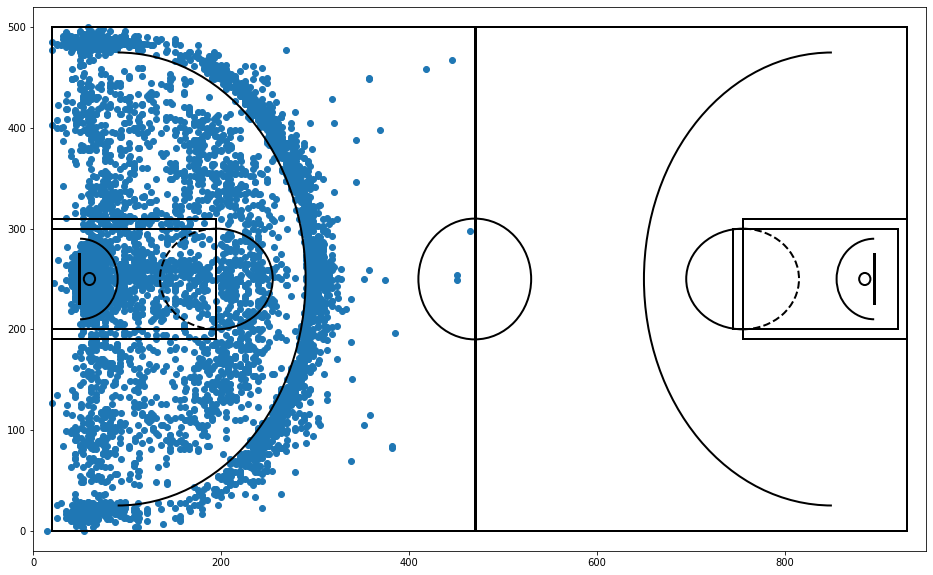

In [127]:
plt.figure(figsize=(16,10))
draw_court(outer_lines=True)
plt.xlim(0,950)
plt.ylim(-20,520)
plt.scatter(df['loc_x'],df['loc_y'])
plt.show()

In [133]:
def draw_half_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    backboard1 = Rectangle((50, 225), -1, 50, linewidth=lw, color=color)
    
    hoop1 = Circle((55, 250), radius=6, linewidth=lw, color=color, fill=False)
    
    restricted1 = Arc((50, 250), 80, 80, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow1_outer = Arc((195, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow1_inner = Arc((195, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color, linestyle='dashed')
    
    freethrow1_point = Circle((195, 250), radius=4, linewidth=lw, color=color, fill=True)
    
    threepoint1 = Arc((90, 250), 450, 400, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    innerbox1 = Rectangle((20, 200), 175, 100, linewidth=lw, color=color,
                          fill=False)
    
    outbox1 = Rectangle((20, 190), 175, 120, linewidth=lw, color=color,
                      fill=False)
    
    half_court_circle  = Arc((490, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    half_court_point  = Arc((490, 250), 5, 5, angle=270, theta1=180, theta2=0, linewidth=6,
                 color=color)
    
    lower_three_line = Rectangle((20, 25), 70, 1, linewidth=0.25*lw, color=color,
                          fill=True)
    
    upper_three_line = Rectangle((20, 475), 70, 1, linewidth=0.25*lw, color=color,
                      fill=True)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [backboard1, hoop1, restricted1,
                       threepoint1, innerbox1, freethrow1_outer,freethrow1_point,
                      outbox1, freethrow1_inner,lower_three_line, upper_three_line, half_court_circle, half_court_point]
    
    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((20, 0), 470, 500, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    
      # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_aspect('auto')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom=True, labelleft=True)
    
    return ax

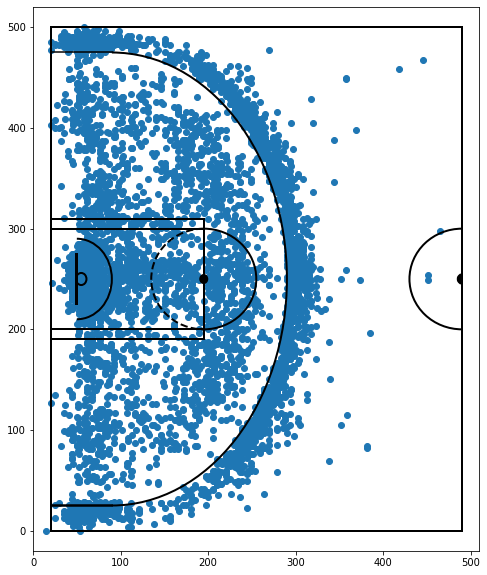

In [134]:
plt.figure(figsize=(8,10))
draw_half_court(outer_lines=True)
plt.scatter(df['loc_x'],df['loc_y'])
plt.xlim(0,510)
plt.ylim(-20,520)
plt.show()